In [54]:
#inport the raw data
import pandas as pd
score_data_raw = pd.read_csv('/content/drive/MyDrive/Applied AI/Assessement/International Football/results.csv')


In [2]:
#poisson distribution library
!pip install spicy

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [192]:
score_data_raw
#Data Overview

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
45095,2023-10-17,Lithuania,Hungary,2,2,UEFA Euro qualification,Kaunas,Lithuania,False
45096,2023-10-17,Finland,Kazakhstan,1,2,UEFA Euro qualification,Helsinki,Finland,False
45097,2023-10-17,Northern Ireland,Slovenia,0,1,UEFA Euro qualification,Belfast,Northern Ireland,False
45098,2023-10-17,San Marino,Denmark,1,2,UEFA Euro qualification,Serravalle,San Marino,False


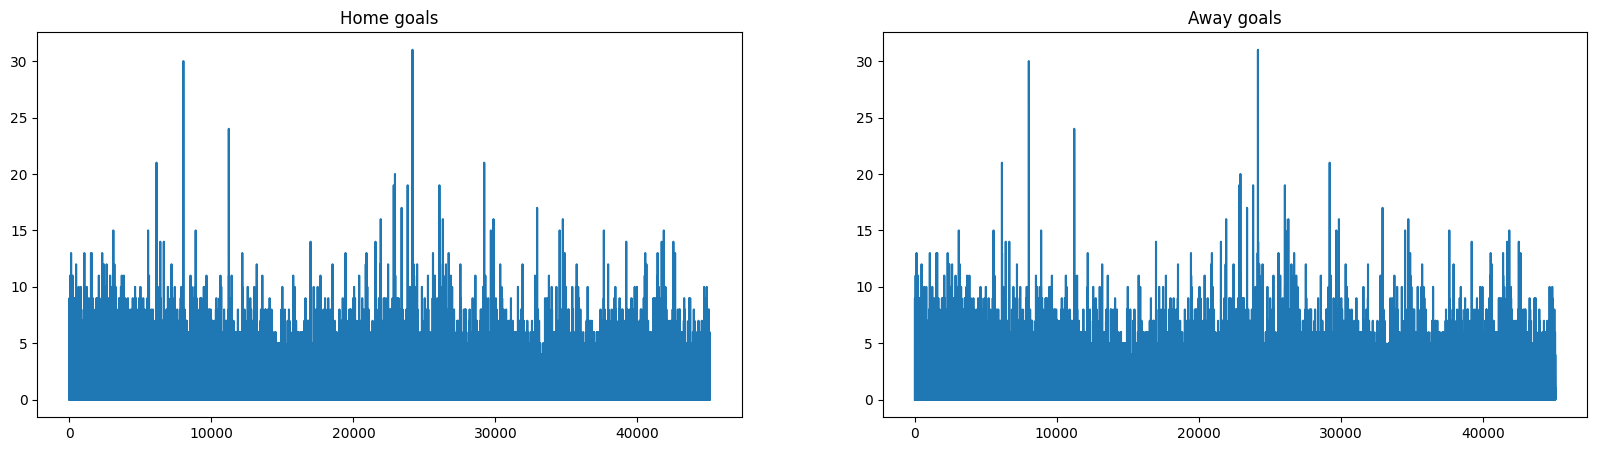

In [193]:
#Comparing home and away goal statuses
score_data = score_data_raw
home_goals = [x for x in score_data['home_score']]
away_goals = [x for x in score_data['away_score']]

_,ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(home_goals)
ax[0].title.set_text('Home goals')
ax[1].plot(home_goals)
ax[1].title.set_text('Away goals')

In [194]:
print(f'Max home goals is {np.max(home_goals)}')
print(f'Max away goals is {np.max(away_goals)}')

Max home goals is 31
Max away goals is 21


In [195]:
score_data = score_data_raw[(score_data_raw['neutral'])==False]
score_data
#ignoring neutral games

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
45095,2023-10-17,Lithuania,Hungary,2,2,UEFA Euro qualification,Kaunas,Lithuania,False
45096,2023-10-17,Finland,Kazakhstan,1,2,UEFA Euro qualification,Helsinki,Finland,False
45097,2023-10-17,Northern Ireland,Slovenia,0,1,UEFA Euro qualification,Belfast,Northern Ireland,False
45098,2023-10-17,San Marino,Denmark,1,2,UEFA Euro qualification,Serravalle,San Marino,False


In [196]:
#average home goals
home_mean = np.mean(home_goals)
print(home_mean)

1.73960088691796


In [197]:
#average away goals
away_mean = np.mean(away_goals)
print(away_mean)

1.1779822616407982


In [61]:
cols = list(score_data)
df = pd.DataFrame(score_data,columns = cols)
#score_data =  pd.concat( [df[df['home_team'].str.contains('England')], df[df['away_team'].str.contains('England')]])

In [62]:
score_data = score_data.drop(columns=['city','neutral'])

Rearranging Teams

In [63]:
#extracting every team and indexing
import numpy as np
home = np.array((score_data['home_team']).unique())
away = np.array((score_data['away_team']).unique())
teams = home
for tmp in away:
  if tmp not in teams:
    teams = np.append(teams,[tmp])
print(len(teams))

303


In [64]:
team_id = dict()
t=1.0

for team in teams:
    team_id[team]=t
    t+=1.0

In [66]:
#extracting every tournament and indexing
tournament = np.array((score_data['tournament']).unique())
tournament_id = dict()
t=1.0

for tmt in tournament:
    tournament_id[tmt]=t
    t+=1.0

In [67]:
#extracting every date and indexing
dates = np.array((score_data['date']))
year = []
month = []
i = 0
while i<len(dates):
    year = float(dates[i].split('-')[0])
    month = float(dates[i].split('-')[1])
    i+=1

In [68]:
score_data['year'] = year
score_data['month'] = month

In [69]:
#replacing each value by its index
for index, row in score_data.iterrows():
  #print(score_clean.loc[index,['home_team','away_team']])
  score_data.loc[index,['home_team','away_team','tournament']] = [team_id[row['home_team']],team_id[row['away_team']],tournament_id[row['tournament']]]

In [70]:
score_data = score_data.drop(columns = 'date')

In [71]:
score_data

,home_team,away_team,home_score,away_score,tournament,country,year,month
0,1.0,2.0,0,0,1.0,Scotland,2023.0,10.0
1,2.0,1.0,4,2,1.0,England,2023.0,10.0
2,1.0,2.0,2,1,1.0,Scotland,2023.0,10.0
3,2.0,1.0,2,2,1.0,England,2023.0,10.0
4,1.0,2.0,3,0,1.0,Scotland,2023.0,10.0
...,...,...,...,...,...,...,...,...
45095,43.0,8.0,2,2,31.0,Lithuania,2023.0,10.0
45096,20.0,207.0,1,2,31.0,Finland,2023.0,10.0
45097,4.0,203.0,0,1,31.0,Northern Ireland,2023.0,10.0
45098,201.0,23.0,1,2,31.0,San Marino,2023.0,10.0


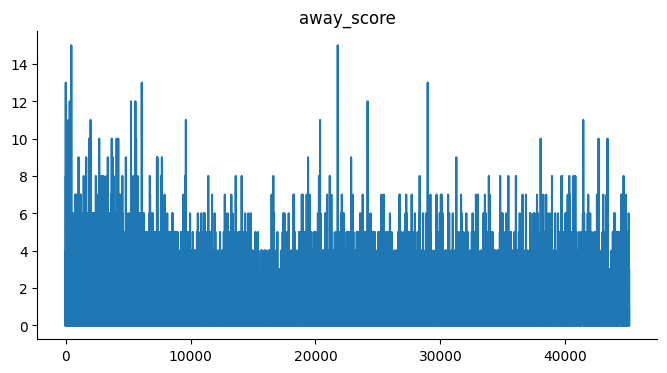

In [72]:
score_data['away_score'].plot(kind='line', figsize=(8, 4), title='away_score')
plt.gca().spines[['top', 'right']].set_visible(False)

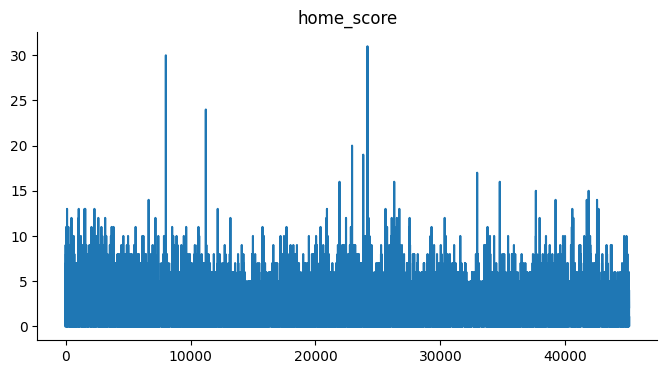

In [73]:
score_data['home_score'].plot(kind='line', figsize=(8, 4), title='home_score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [74]:
#calculating the number of goals per team per season
goals_season = dict()
match_season = dict()
y = 1871
while y<2023:
 y+=1
 subdata = score_data.loc[score_data['year']==float(year)]
 team_goal_scored = dict()
 team_matches = dict()

 for key, trn in tournament_id.items():
    trndata = subdata.loc[(subdata['tournament']== trn)]
    #print(trn)
    trn_goal_scored = dict()
    trn_matches = dict()

    for i, row in trndata.iterrows():
  #Goals score for each team
      if row['home_team'] not in trn_goal_scored:
        trn_goal_scored[row['home_team']] = float(row['home_score'])
      else:
        trn_goal_scored[row['home_team']] += float(row['home_score'])

      if row['away_team'] not in trn_goal_scored:
        trn_goal_scored[row['away_team']] = float(row['away_score'])
      else:
        trn_goal_scored[row['away_team']] += float(row['away_score'])
    #Number of matches
      trn_matches[row["home_team"]] = 1 if row['home_team'] not in trn_matches else trn_matches[row["home_team"]] + 1
      trn_matches[row["away_team"]] = 1 if row['away_team'] not in trn_matches else trn_matches[row["home_team"]] + 1
    #print(f'trn:{trn} ')
    team_goal_scored[trn] = trn_goal_scored
    team_matches[trn] = trn_matches
    #goals scored per tournament
    #number of matches per tournament


 goals_season[float(y)] = team_goal_scored
 match_season[float(y)] = team_matches

Streaming output truncated to the last 5000 lines.
trn:77.0 
trn:78.0 
trn:79.0 
trn:80.0 
trn:81.0 
trn:82.0 
trn:83.0 
trn:84.0 
trn:85.0 
trn:86.0 
trn:87.0 
trn:88.0 
trn:89.0 
trn:90.0 
trn:91.0 
trn:92.0 
trn:93.0 
trn:94.0 
trn:95.0 
trn:96.0 
trn:97.0 
trn:98.0 
trn:99.0 
trn:100.0 
trn:101.0 
trn:102.0 
trn:103.0 
trn:104.0 
trn:105.0 
trn:106.0 
trn:107.0 
trn:108.0 
trn:109.0 
trn:110.0 
trn:111.0 
trn:112.0 
trn:113.0 
trn:114.0 
trn:115.0 
trn:116.0 
trn:117.0 
trn:118.0 
trn:119.0 
trn:120.0 
trn:121.0 
trn:122.0 
trn:123.0 
trn:124.0 
trn:125.0 
trn:126.0 
trn:127.0 
trn:128.0 
trn:129.0 
trn:130.0 
trn:131.0 
trn:132.0 
trn:133.0 
trn:134.0 
trn:135.0 
trn:136.0 
trn:137.0 
trn:138.0 
trn:139.0 
trn:140.0 
trn:141.0 
trn:1.0 
trn:2.0 
trn:3.0 
trn:4.0 
trn:5.0 
trn:6.0 
trn:7.0 
trn:8.0 
trn:9.0 
trn:10.0 
trn:11.0 
trn:12.0 
trn:13.0 
trn:14.0 
trn:15.0 
trn:16.0 
trn:17.0 
trn:18.0 
trn:19.0 
trn:20.0 
trn:21.0 
trn:22.0 
trn:23.0 
trn:24.0 
trn:25.0 
trn:26.0 
trn:27

In [ ]:
print(goals_season[1872.0][1.0])

{1.0: 384.0, 2.0: 920.0, 3.0: 175.0, 4.0: 119.0, 5.0: 492.0, 29.0: 203.0, 6.0: 471.0, 9.0: 659.0, 7.0: 842.0, 8.0: 1186.0, 13.0: 520.0, 11.0: 833.0, 14.0: 648.0, 10.0: 778.0, 12.0: 900.0, 16.0: 1257.0, 15.0: 1073.0, 19.0: 612.0, 17.0: 677.0, 18.0: 451.0, 20.0: 431.0, 21.0: 118.0, 24.0: 75.0, 22.0: 556.0, 23.0: 618.0, 26.0: 960.0, 25.0: 156.0, 27.0: 393.0, 52.0: 106.0, 28.0: 332.0, 30.0: 297.0, 271.0: 0.0, 31.0: 300.0, 62.0: 203.0, 32.0: 247.0, 36.0: 495.0, 35.0: 896.0, 33.0: 633.0, 41.0: 443.0, 34.0: 18.0, 38.0: 525.0, 37.0: 328.0, 44.0: 427.0, 39.0: 219.0, 40.0: 18.0, 47.0: 2.0, 48.0: 709.0, 42.0: 25.0, 313.0: 3.0, 43.0: 483.0, 45.0: 185.0, 46.0: 387.0, 49.0: 73.0, 67.0: 226.0, 53.0: 465.0, 50.0: 466.0, 106.0: 263.0, 51.0: 278.0, 54.0: 368.0, 64.0: 361.0, 55.0: 519.0, 60.0: 465.0, 58.0: 279.0, 59.0: 172.0, 65.0: 603.0, 61.0: 170.0, 223.0: 168.0, 63.0: 177.0, 82.0: 60.0, 66.0: 310.0, 85.0: 266.0, 68.0: 51.0, 69.0: 24.0, 70.0: 150.0, 117.0: 286.0, 72.0: 376.0, 73.0: 70.0, 147.0: 63.0, 7

In [75]:
#lambda: average goals for each team
l_home = []
l_away = []

for i, row in score_data.iterrows():
  #lbd1 = team_goal_scored[row['home_team']]/team_matches[row['home_team']]
  #lbd2 = team_goal_scored[row['away_team']]/team_matches[row['away_team']]
  lbd1 = goals_season[row['year']][row['tournament']][row['home_team']]  / match_season[row['year']][row['tournament']][row['home_team']]
  lbd2 = goals_season[row['year']][row['tournament']][row['away_team']] / match_season[row['year']][row['tournament']][row['away_team']]
  l_home.append(lbd1)
  l_away.append(lbd2)
score_data['l_home'] = l_home
score_data['l_away'] = l_away

In [76]:
score_data

,home_team,away_team,home_score,away_score,tournament,country,year,month,l_home,l_away
0,1.0,2.0,0,0,1.0,Scotland,2023.0,10.0,15.200000,6.302817
1,2.0,1.0,4,2,1.0,England,2023.0,10.0,6.302817,15.200000
2,1.0,2.0,2,1,1.0,Scotland,2023.0,10.0,15.200000,6.302817
3,2.0,1.0,2,2,1.0,England,2023.0,10.0,6.302817,15.200000
4,1.0,2.0,3,0,1.0,Scotland,2023.0,10.0,15.200000,6.302817
...,...,...,...,...,...,...,...,...,...,...
45095,43.0,8.0,2,2,31.0,Lithuania,2023.0,10.0,0.313433,1.084158
45096,20.0,207.0,1,2,31.0,Finland,2023.0,10.0,1.181034,0.393162
45097,4.0,203.0,0,1,31.0,Northern Ireland,2023.0,10.0,1.130435,1.000000
45098,201.0,23.0,1,2,31.0,San Marino,2023.0,10.0,0.077586,1.863248


getting score column

In [78]:
#getting score difference
diff = [(float(score_data.loc[index,['home_score']]) - float((score_data.loc[index,['away_score']]))) for index,row in score_data.iterrows()]

In [79]:
score_data['diff'] = diff

In [80]:
#identifying winning team and ignoring draws
score_data['target'] = np.zeros(len(diff))
_data = score_data
for idx, row in _data.iterrows():
  if row['diff'] < 0:
    #print(row['diff'])
    _data.loc[idx,['target']] = 0.0
  elif row['diff'] > 0:
    _data.loc[idx,['target']] = 1.0
  else:
    _data = _data.drop(idx)

In [81]:
cols  = list(score_data)
train_data = pd.DataFrame(_data,columns = cols)

In [82]:
train_data

,home_team,away_team,home_score,away_score,tournament,country,year,month,l_home,l_away,diff,target
1,2.0,1.0,4,2,1.0,England,2023.0,10.0,6.302817,15.200000,2.0,1.0
2,1.0,2.0,2,1,1.0,Scotland,2023.0,10.0,15.200000,6.302817,1.0,1.0
4,1.0,2.0,3,0,1.0,Scotland,2023.0,10.0,15.200000,6.302817,3.0,1.0
5,1.0,3.0,4,0,1.0,Scotland,2023.0,10.0,15.200000,8.238095,4.0,1.0
6,2.0,1.0,1,3,1.0,England,2023.0,10.0,6.302817,15.200000,-2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45094,220.0,156.0,3,1,31.0,Serbia,2023.0,10.0,0.868421,0.226087,2.0,1.0
45096,20.0,207.0,1,2,31.0,Finland,2023.0,10.0,1.181034,0.393162,-1.0,0.0
45097,4.0,203.0,0,1,31.0,Northern Ireland,2023.0,10.0,1.130435,1.000000,-1.0,0.0
45098,201.0,23.0,1,2,31.0,San Marino,2023.0,10.0,0.077586,1.863248,-1.0,0.0


In [123]:
#removing all unecessary columns and setting the target
X = train_data.drop(columns = ['target','month','home_score','away_score','diff','country','tournament','year'])
#score_data.loc[score_data['year']==float(year)]

Y = train_data[['target']].to_numpy()

In [124]:
#Feature-set visualization
X

,home_team,away_team,l_home,l_away
1,2.0,1.0,6.302817,15.200000
2,1.0,2.0,15.200000,6.302817
4,1.0,2.0,15.200000,6.302817
5,1.0,3.0,15.200000,8.238095
6,2.0,1.0,6.302817,15.200000
...,...,...,...,...
45094,220.0,156.0,0.868421,0.226087
45096,20.0,207.0,1.181034,0.393162
45097,4.0,203.0,1.130435,1.000000
45098,201.0,23.0,0.077586,1.863248


In [126]:
from scipy.stats import poisson

In [127]:
#dataset normalization and segmentation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 500)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
# Generate Poisson probabilities for different goal counts
def getProbs(l1,l2,k):
 home_goal_probs = [poisson.pmf(k, l1) for k in range(k)]
 away_goal_probs = [poisson.pmf(k, l2) for k in range(k)]

# Combine probabilities for match outcomes
 home_score, away_score, prob = .0,.0,.0
 i = 0
 for home_goals in range(k):
    for away_goals in range(k):
        home_prob = home_goal_probs[home_goals]
        away_prob = away_goal_probs[away_goals]
        win =0
        if home_prob * away_prob> prob:
          home_score = home_goals
          away_score = away_goals
          prob = home_prob * away_prob
 #print(f'Home {home_score}, Away {away_score}, Prob: {prob}')
 win = 2
 if home_score> away_score: win = 0
 elif home_score < away_score: win = 1
 return win

#calculate the probability for each match
i=0
xx = X_train.to_numpy()
y_pred = np.zeros((len(xx),1))
while i < len(xx):
  y_pred[i] = [getProbs(xx[i][2],xx[i][3],10)]
  i+=1

In [130]:
#calculating prediction accuracy
tmp = (np.sum(y_pred==y_train))
print(tmp / len(y_pred))

0.21388732538504834


In [170]:
#knn model, calculate accuracy for different k values
from sklearn.neighbors import KNeighborsClassifier
scores = []
Ks = []
for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  score = knn.score(X_test_scaled, y_test)
  scores.append(score)
  Ks.append(i)
  print(f'For k={i}, accuracy = {score}')

For k=1, accuracy = 0.6692248656945511
For k=2, accuracy = 0.6225633154259401
For k=3, accuracy = 0.6850345356868764
For k=4, accuracy = 0.6652340752110514
For k=5, accuracy = 0.6990023023791251
For k=6, accuracy = 0.6778204144282425
For k=7, accuracy = 0.7034535686876439
For k=8, accuracy = 0.6896392939370684
For k=9, accuracy = 0.6982348426707597
For k=10, accuracy = 0.689025326170376
For k=11, accuracy = 0.6930161166538756
For k=12, accuracy = 0.6930161166538756
For k=13, accuracy = 0.6959324635456638
For k=14, accuracy = 0.6966999232540292


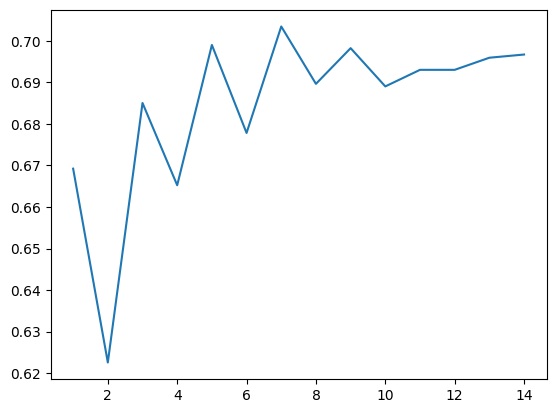

In [171]:
plt.plot(Ks, scores)

In [189]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(10,10,10,10),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.001)

# Fit data onto the model
clf.fit(X_train,y_train)



Iteration 1, loss = 1.20746462
Iteration 2, loss = 0.64532499
Iteration 3, loss = 0.63263111
Iteration 4, loss = 0.62595184
Iteration 5, loss = 0.62141535
Iteration 6, loss = 0.61778690
Iteration 7, loss = 0.61519191
Iteration 8, loss = 0.61458343
Iteration 9, loss = 0.61272707
Iteration 10, loss = 0.61167374
Iteration 11, loss = 0.61143897
Iteration 12, loss = 0.60996774
Iteration 13, loss = 0.61018501
Iteration 14, loss = 0.60790160
Iteration 15, loss = 0.60876495
Iteration 16, loss = 0.60873765
Iteration 17, loss = 0.60656901
Iteration 18, loss = 0.60762112
Iteration 19, loss = 0.60542936
Iteration 20, loss = 0.60489960
Iteration 21, loss = 0.60511350
Iteration 22, loss = 0.60383058
Iteration 23, loss = 0.60227042
Iteration 24, loss = 0.60140047
Iteration 25, loss = 0.60131541
Iteration 26, loss = 0.60042864
Iteration 27, loss = 0.59987880
Iteration 28, loss = 0.60039763
Iteration 29, loss = 0.59785453
Iteration 30, loss = 0.59745738
Iteration 31, loss = 0.59657921
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), random_state=5, verbose=True)

In [191]:
ypred=clf.predict(X_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.69623944742901